In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# nombres de las columnas
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# cargar el conjunto de datos
iris_data = pd.read_csv(url, names=names )

# mostrar los primeros 10 registros del conjunto de datos
print(iris_data.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [3]:
iris_data = load_iris()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)
input_shape=(X_train.shape[1])
print(input_shape)

4


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:

history=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=5)


Epoch 1/50
24/24 [==============================] - 1s 13ms/step - loss: 1.2633 - accuracy: 0.3333 - val_loss: 1.0279 - val_accuracy: 0.3333
Epoch 2/50
24/24 [==============================] - 0s 6ms/step - loss: 0.9385 - accuracy: 0.4000 - val_loss: 0.8052 - val_accuracy: 0.8333
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 0.7550 - accuracy: 0.9083 - val_loss: 0.6874 - val_accuracy: 0.9667
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.9500 - val_loss: 0.6106 - val_accuracy: 1.0000
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.9583 - val_loss: 0.5539 - val_accuracy: 1.0000
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.9333 - val_loss: 0.5129 - val_accuracy: 1.0000
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.9667 - val_loss: 0.4707 - val_accuracy: 1.0000
Epoch 8/50
24/24 [=

Final loss:  0.1272563338279724


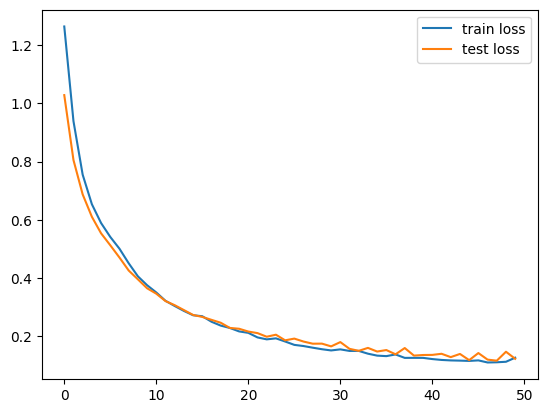

In [6]:
final_loss = history.history['loss'][-1]
print("Final loss: ", final_loss)

# Plot the loss and accuracy graphs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

Final Accuracy : 0.949999988079071


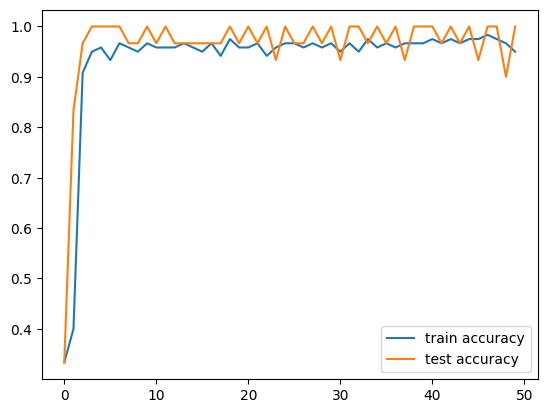

In [7]:
accuracy = history.history['accuracy'][-1]
print('Final Accuracy :', accuracy)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

form 1 to make the matrix

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

1/1 [==============================] - 0s 23ms/step


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

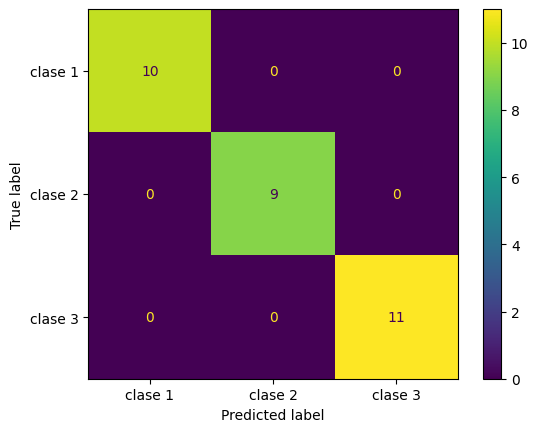

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['clase 1', 'clase 2', 'clase 3'])
disp.plot()

form 2 to make the matrix

1/1 [==============================] - 0s 29ms/step
confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


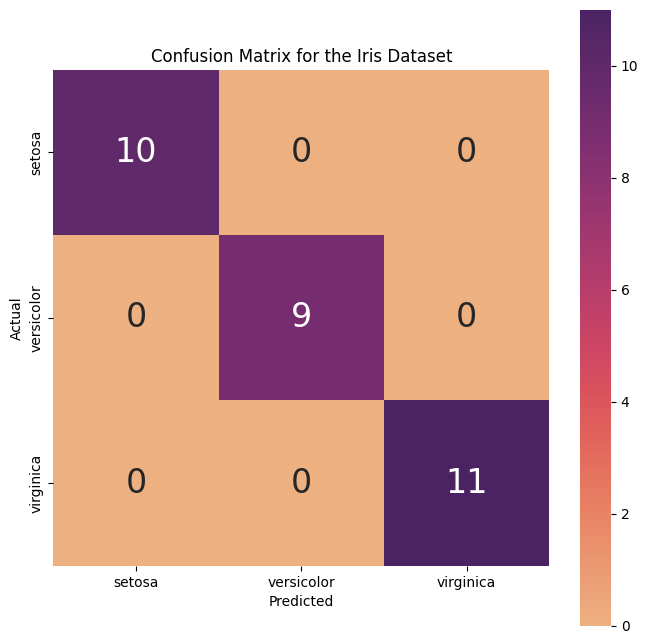

In [10]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)


# Print classifier
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:", cm, sep="\n")

# Draw confusion matrix using seaborn
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris_data.target_names,
                 yticklabels=iris_data.target_names,
                 fmt='g', cmap='flare', annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for the Iris Dataset')
plt.show()